In [1]:
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Esercizio 2

Write a Python program that optimizes the Sphere Problem through a genetic algorithm and plots the best fitness against the number of generations.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = \sum_{i=0}^{n-1} x_i^2$$

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [3]:
IND_SIZE = 10
TOURN_SIZE = 3

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.uniform(-5.14,5.14))
#individuals
#toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float) 
#population
#toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [4]:
#Evaluate function
def evaluate(individual):
    return sum([i**2 for i in individual])
toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [5]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, dim, stats):
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=dim) 
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = [fit]

        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])


        record = stats.compile(pop) if stats else{}
        #print(record)
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        

    return pop, logbook, dim

In [6]:
def iterate(f):
    sum = 0
    for i in range(15):
        sum += f[1][len(f[1])-1]['min']
    return sum/15

GA_exe = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, dim=5,stats=stats)
GA_exe2 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, dim=10, stats=stats)
GA_exe3 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, dim=20, stats=stats)

means = [iterate(GA_exe), iterate(GA_exe2), iterate(GA_exe3)]
print(means)

[0.01831387653787716, 0.05107207104736045, 0.4197355497501898]


In [7]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 41.18993369710757,
  'std': 15.550963522403492,
  'min': 15.563283359484341,
  'max': 62.83446963896769},
 {'gen': 1,
  'nevals': 8,
  'avg': 23.88992927421552,
  'std': 10.75823091815426,
  'min': 14.276844682712714,
  'max': 44.44937938796264},
 {'gen': 2,
  'nevals': 10,
  'avg': 15.820294524808713,
  'std': 4.641222378792129,
  'min': 12.3289305789075,
  'max': 29.086379853934677},
 {'gen': 3,
  'nevals': 8,
  'avg': 13.487596733545434,
  'std': 0.8916400345570653,
  'min': 12.3289305789075,
  'max': 14.276844682712714},
 {'gen': 4,
  'nevals': 9,
  'avg': 11.79738548113311,
  'std': 1.1010758672942467,
  'min': 9.596004286153821,
  'max': 12.404131382789224},
 {'gen': 5,
  'nevals': 10,
  'avg': 10.415882173979924,
  'std': 1.2523841605278774,
  'min': 9.596004286153821,
  'max': 12.3289305789075},
 {'gen': 6,
  'nevals': 8,
  'avg': 9.596004286153823,
  'std': 1.7763568394002505e-15,
  'min': 9.596004286153821,
  'max': 9.596004286153821},
 {'

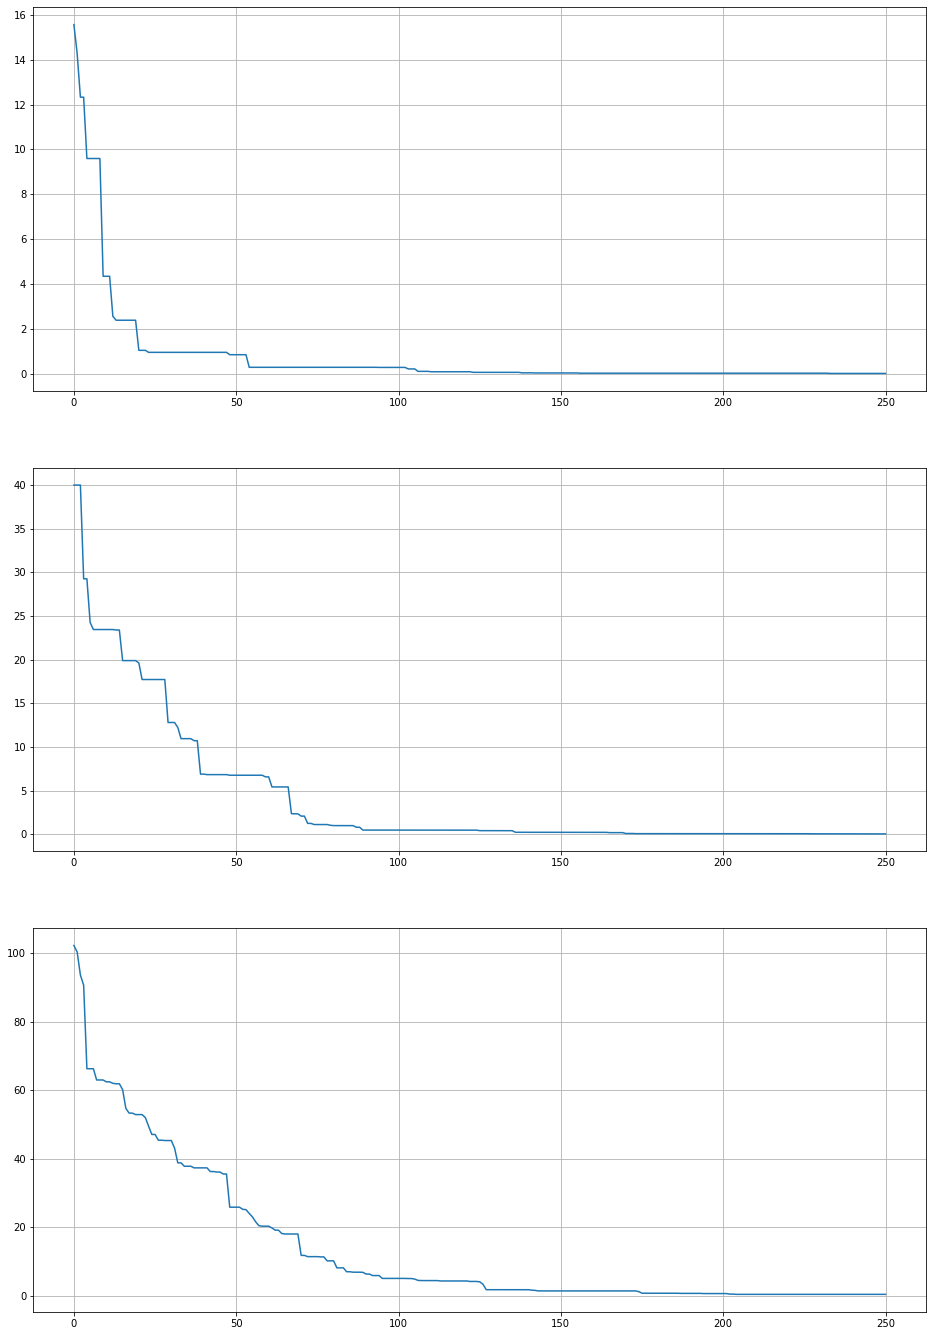

In [8]:
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]
min_values2 = [GA_exe2[1][i]['min'] for i in range(len(GA_exe2[1]))]
ngen2 = [i for i in range(len(GA_exe2[1]))]
min_values3 = [GA_exe3[1][i]['min'] for i in range(len(GA_exe3[1]))]
ngen3 = [i for i in range(len(GA_exe3[1]))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,24))
ax1.plot(ngen, min_values)
ax2.plot(ngen2, min_values2)
ax3.plot(ngen3, min_values3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

5


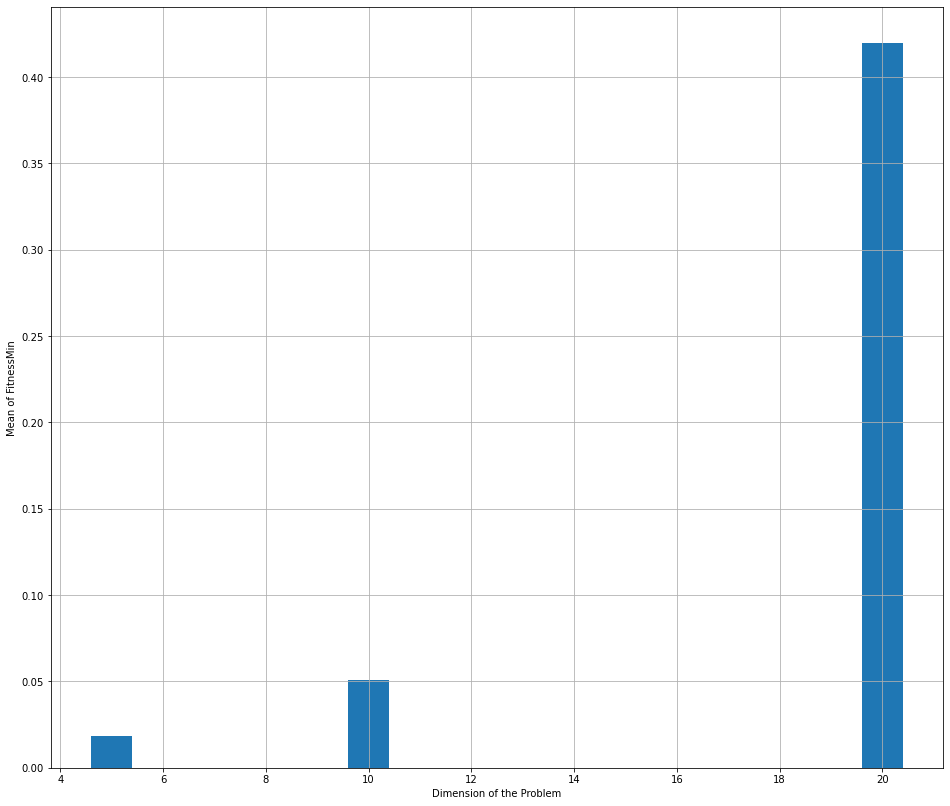

In [9]:
plt.figure(figsize=(16,14))
print(GA_exe[2])
plt.xlabel("Dimension of the Problem")
plt.ylabel("Mean of FitnessMin")
plt.bar((GA_exe[2],GA_exe2[2],GA_exe3[2]), means)
plt.grid()
plt.show()